In [1]:
import numpy as np

In [2]:
m = np.ones((3,3))/9
x = np.ndenumerate(m)

for i in x:
    print(i)

((0, 0), 0.1111111111111111)
((0, 1), 0.1111111111111111)
((0, 2), 0.1111111111111111)
((1, 0), 0.1111111111111111)
((1, 1), 0.1111111111111111)
((1, 2), 0.1111111111111111)
((2, 0), 0.1111111111111111)
((2, 1), 0.1111111111111111)
((2, 2), 0.1111111111111111)


In [3]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
a = np.round(np.random.randn(3,3)*20)
a

array([[ 13.,   4.,   3.],
       [-10.,  10.,  34.],
       [ -4.,  -8.,  18.]])

In [5]:
np.min(a)


-10.0

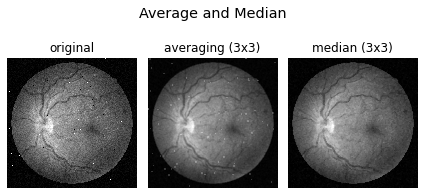

In [21]:
'''
___OVERVIEW___
CODE FOR QUESTION 2 - HW 3

___SUMMARY___
Filterning (linear and non-linear)

___AUTHOR___
Amirhossein Daraie — 9733023

___DATE___
18/April/2021
29/01/1400

'''

import numpy as np
import matplotlib.pyplot as plt
import cv2

def filter(image ,mode="averaging", size=3, padding=1, stride=1):   
    
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='symmetric')

    kernel_height, kernel_width = (size,size)
    padded_height, padded_width = image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)       
        
    if mode == "averaging" :
        kernel = np.ones((size,size))/size**2
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, 
                                                x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
                
    elif mode == "median":
        kernel = np.ones((size,size))
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.median(image[y * stride:y * stride + kernel_height, 
                                                x * stride:x * stride + kernel_width]).astype(np.float32)

    return new_image


# load image
image = cv2.imread("retina.jpg", flags=cv2.IMREAD_GRAYSCALE)
# apply filters
avg3x3 = filter(image, mode='averaging')
med3x3 = filter(image, mode='median')

fig, ax = plt.subplots(1,3,figsize=(6,3))
st = fig.suptitle("Average and Median", fontsize="x-large")

ax[0].title.set_text('original')
ax[0].imshow(image,vmin=avg3x3.min(),vmax=avg3x3.max(), cmap='gray', interpolation='nearest')

ax[1].title.set_text('averaging (3x3)')
ax[1].imshow(avg3x3,vmin=avg3x3.min(),vmax=avg3x3.max(), cmap='gray', interpolation='nearest')

ax[2].title.set_text('median (3x3)')
ax[2].imshow(med3x3,vmin=med3x3.min(),vmax=med3x3.max(), cmap='gray', interpolation='nearest')

for axi in ax.ravel():
    axi.axis('off')
plt.tight_layout()
# plt.savefig('9733023-2_image1.png', bbox_inches='tight')
plt.show()

In [22]:
image = cv2.imread("retina.jpg", flags=cv2.IMREAD_GRAYSCALE)

In [23]:
image

array([[ 1,  1,  0, ...,  4,  5,  7],
       [ 0,  3,  0, ..., 11,  0,  1],
       [ 4, 14,  7, ...,  8,  0,  0],
       ...,
       [ 5,  6,  0, ...,  5,  8,  3],
       [ 2,  0, 11, ...,  8,  7,  0],
       [ 0,  2,  0, ...,  3,  5,  1]], dtype=uint8)